# Python Assignment
## By Dylan Harris

In [1]:
#Loading required packages
from Bio import SeqIO
from Bio import Seq
from Bio.Data import CodonTable
import pandas as pd
import seaborn as sns

In-line comments will provide descriptions on what that code for that line is doing.

## Functions
### Question 1

In [2]:
def get_sequences_from_file(fasta_fn): #Begins defining a new function called "get_sequences_from file" from a fasta
    sequence_data_dict = {} #Creates and empty dictionary named sequence_data_dict
    for record in SeqIO.parse(fasta_fn, "fasta"): #for loop for each record in fasta, parse as described below
        description = record.description.split() #splits the description of each record into individual items
        species_name = description[1] + " " + description[2] #Creates an item from each of those split records that will become the species name "genus species"
        sequence_data_dict[species_name] = record.seq #Sets the species name value to be the penguin cytb DNA
    return(sequence_data_dict) #Returns the now filled dictionary containing species names followed by its sequence

In [3]:
get_sequences_from_file("penguins_cytb.fasta") #testing function on provided fasta file

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

### Question 2

In [4]:
 def translate_function(string_nucleotides): #Start defining new function, remove stop codon before starting
     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #load a codon table and call it mito_table
     aa_seq = "" #Create empty string aa_seq
     for aa in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[aa:aa + 3]  #For every 3 nucleotides in the string indexing from 0 to length of the string, create a codon
        aa_seq += mito_table.forward_table[codon] #Stop codon must be removed before running function on it, codon is referenced to the provided table to be assigned to an amino acid which is then added to the aa_seq string then the loop repeats
     return(aa_seq)

Some inspiration of code obtained from: https://www.geeksforgeeks.org/dna-protein-python-3/

In [5]:
translate_function("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCAT") #Stop codon removed, testing function

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

### Question 3

In [6]:
def make_protein(string_nucleotides): #Start defining new funtion make_protein
    aa_seq = Seq.translate(string_nucleotides, table="Vertebrate Mitochondrial", to_stop=True) #Translate funtion found in Biopython documentation
    return str(aa_seq) #make sure to convert Seq object into a string for further analysis

In [7]:
make_protein("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

Translate funtion found in Biopython tutorial: http://biopython.org/DIST/docs/tutorial/Tutorial.html

### Question 4

In [8]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis #import required function
def compute_molecular_weight(aa_seq): #Start defining new function
    analysed_seq = ProteinAnalysis(aa_seq) #use protein analysis function on string
    return(analysed_seq.molecular_weight()) #will give molecular weight of the provided string

In [9]:
aa_seq = "MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH"
compute_molecular_weight(aa_seq)

42459.602100000004

### Question 5

In [10]:
def gc_content(string_nucleotides): #start defining function
    gc_count = (string_nucleotides.count("G") + string_nucleotides.count("C")) #Count both Gs and Cs in string assign to item
    gc_percent = gc_count / len(string_nucleotides) * 100 #Divide the gc_count item by length of string and multiply by 100 to get percentage
    return(gc_percent)

In [11]:
gc_content("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")

48.38145231846019

## Main

In [12]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

### Question 6

In [13]:
penguins_df['mol_weight'] = 'NaN' #Assign new column mol_weight with NaN in all rows
penguins_df['GC_content'] = 'NaN' #Assign new column GC_count with NaN in all rows
print(penguins_df) #Check dataframe

                    species   mass mol_weight GC_content
0      Aptenodytes forsteri  28.00        NaN        NaN
1   Aptenodytes patagonicus  13.40        NaN        NaN
2       Eudyptes chrysocome   2.80        NaN        NaN
3     Eudyptes chrysolophus   4.50        NaN        NaN
4         Eudyptes sclateri   4.25        NaN        NaN
5           Eudyptula minor   1.60        NaN        NaN
6        Pygoscelis adeliae   4.60        NaN        NaN
7     Pygoscelis antarctica   4.10        NaN        NaN
8          Pygoscelis papua   6.10        NaN        NaN
9       Spheniscus demersus   3.20        NaN        NaN
10     Spheniscus humboldti   4.75        NaN        NaN
11  Spheniscus magellanicus   3.40        NaN        NaN


### Question 7

In [18]:
mol_weight_list = [] #create empty list for future use
gc_content_list = [] #create empty list for future use
for species_name in cytb_seqs.items():
    aa_seq = make_protein(str(species_name[1])) #make a aa_seq from the sequence associated with each species name in cytb_seqs, str will make the DNA sequence into a string rather than a Seq object
    weight = compute_molecular_weight(str(aa_seq)) #compute the weight of each aa_seq string, aa_seq is converted to a string from Nontype
    mol_weight_list.append(weight) #append the calculated weight to the empty list previously created
    gc_con = gc_content(str(species_name[1])) #calculate gc content from each sequence string in cytb_seqs
    gc_content_list.append(gc_con) #append calculated gc content to other empty list
penguins_df["mol_weight"] = mol_weight_list #update mol_weight column of penguins_df with values from mol_weight_list
penguins_df["GC_content"] = gc_content_list #update GC_content column of penguins_df with values from gc_content_list
print(penguins_df)

                    species   mass  mol_weight  GC_content
0      Aptenodytes forsteri  28.00  42459.6021   48.381452
1   Aptenodytes patagonicus  13.40  42563.7067   49.693788
2       Eudyptes chrysocome   2.80  42475.5753   51.181102
3     Eudyptes chrysolophus   4.50  42445.5493   50.918635
4         Eudyptes sclateri   4.25  42475.5753   50.831146
5           Eudyptula minor   1.60  42491.6408   49.256343
6        Pygoscelis adeliae   4.60  42458.6140   49.081365
7     Pygoscelis antarctica   4.10  42404.5423   47.769029
8          Pygoscelis papua   6.10  42595.8759   47.156605
9       Spheniscus demersus   3.20  42431.5490   48.293963
10     Spheniscus humboldti   4.75  42399.5520   49.256343
11  Spheniscus magellanicus   3.40  42459.6021   48.206474


### Question 8

<Axes: title={'center': 'Mass vs Species'}, xlabel='species'>

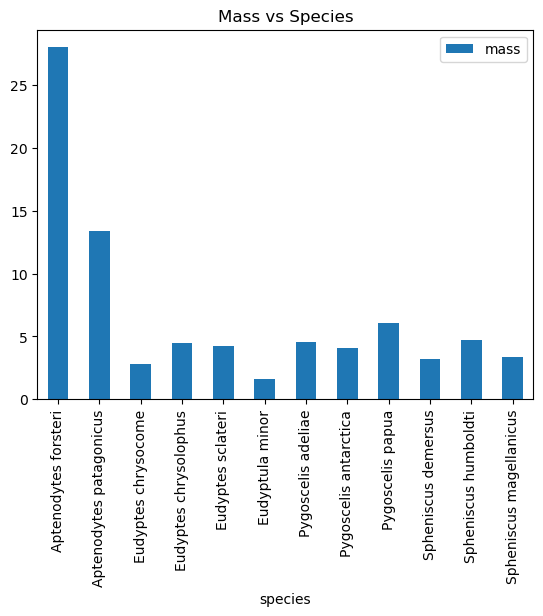

In [21]:
penguins_df.plot(x='species', y='mass', kind='bar', title='Mass vs Species') #simple bar plot with species in x-axis and mass in y-axis

The smallest penguins species is *Eudyptes minor*. This penguins geographical range is from the southern coast of Australia to the South Solitary island off the coast of New South Wales.

Source: https://animaldiversity.org/accounts/Eudyptula_minor/

### Question 9

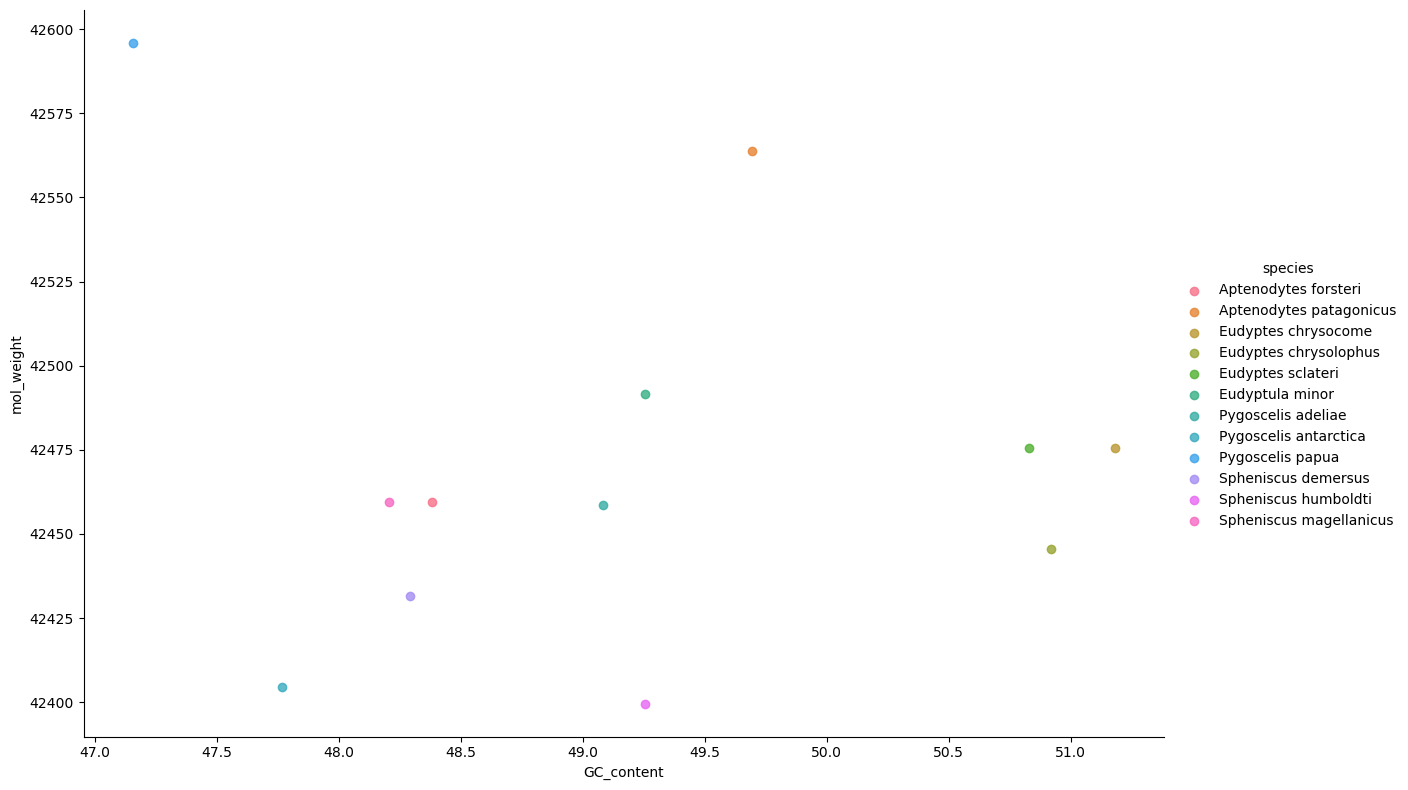

In [23]:
sns.lmplot(x="GC_content", y="mol_weight",data=penguins_df, #Seaborn plot with GC_content on the x-axis and molecular weight on the y-axis for our penguins dataframe
          height=8, aspect=1.5, hue='species') #Species is colored coded and the dimensions of the graph were adjusted for greater visual seperation of points

### Question 10

In [24]:
penguins_df.to_csv('penguins_cytb_mass.csv', index=False) #Save the dataframe as a .csv file, index=False stops the index as being written as the row names (0-11)